![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [84]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Loading the csv file as DataFrame
netflix_df = pd.read_csv('netflix_data.csv')



In [85]:
# Remove leading and trailing spaces
netflix_df = netflix_df.applymap(lambda x : x.strip() if isinstance(x ,str) else x)

# Convert 'date_added' column to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y')

# Convert 'duration' and 'release_year' column to string
netflix_df['duration'] = netflix_df['duration'].astype('str')
netflix_df['release_year'] = netflix_df['release_year'].astype('str')

# Strip whitespace from 'duration' and 'release_year' column
netflix_df['duration'] = netflix_df['duration'].str.strip()
netflix_df['release_year'] = netflix_df['release_year'].str.strip()

# Convert 'duration'  and 'release_year' column to numeric
netflix_df['duration'] = pd.to_numeric(netflix_df['duration'], errors='coerce')
netflix_df['release_year'] = pd.to_numeric(netflix_df['release_year'], errors='coerce')


In [86]:
# Choosing movie only to be separated into netflix_subset
movie = netflix_df[netflix_df['type'] != "TV Show"]

netflix_subset = pd.DataFrame(movie)


In [87]:
# Keeping columns title, country, genre, release_year, duration into netflix_movies
movie_col = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]

netflix_movies = pd.DataFrame(movie_col)


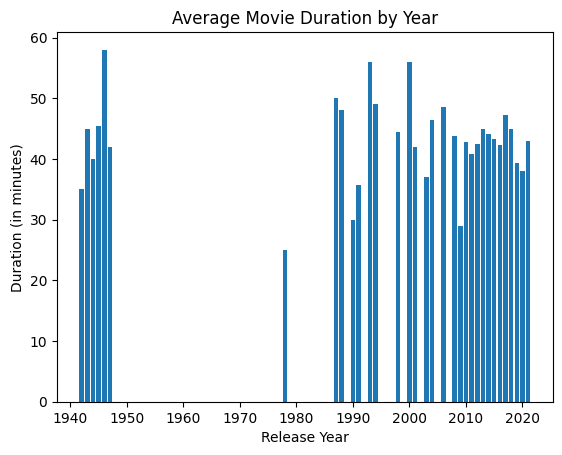

<Figure size 640x480 with 0 Axes>

In [88]:
# Filter movies that are shorter than 60 minutes into short_movies
movie_60 = netflix_movies[netflix_movies['duration'] < 60]

short_movies = pd.DataFrame(movie_60)

# Exploring if length of movies are getting shorter through time
avg_duration = short_movies.dropna().groupby('release_year')['duration'].mean()

plt.bar(avg_duration.index, avg_duration.values)
plt.xlabel('Release Year')
plt.ylabel('Duration (in minutes)')
plt.title('Average Movie Duration by Year')
plt.show()
plt.clf()



In [89]:
# Iterate through the rows of netflix_movies and assign colors to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other") 

colors = []

for x, y in netflix_movies.iterrows():
    if y['genre'] == 'Children':
        colors.append('red')  # Children
    elif y['genre'] == 'Documentaries':
        colors.append('green')  # Documentaries
    elif y['genre'] == 'Stand-Up':
        colors.append('blue')  # Stand-Up
    else:
        colors.append('yellow')  # Others

print(colors)

['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yell

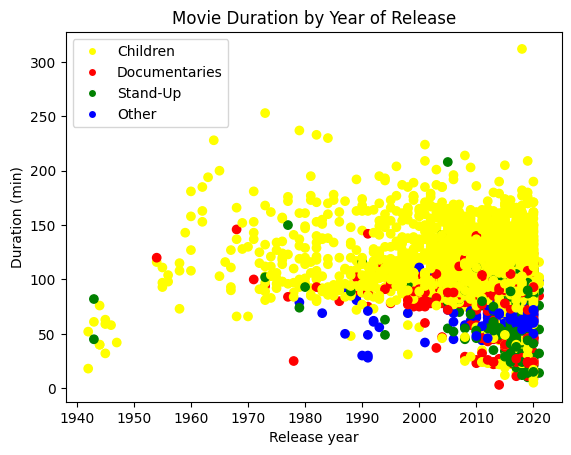

In [90]:
# Initialize fig
fig, ax = plt.subplots()
release_year = netflix_movies['release_year']
duration = netflix_movies['duration']

# Plot the scatter plot with colors
scatter = ax.scatter(release_year, duration, c=colors)

# Set labels and title
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")

# Create a legend mapping colors to genre groups
legend_labels = ['Children', 'Documentaries', 'Stand-Up', 'Other']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label) for color, label in zip(set(colors), legend_labels)]
ax.legend(handles=legend_elements, loc='best')

plt.show()

In [91]:
# Are we certain that movies are getting shorter?
answer = "no"

print(answer)

no
